In [77]:
import pandas as pd
import numpy as np
import os
import glob
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('C://Users//nkdge//Desktop//eeg_train.csv')
train_df = df[0:1000]

In [52]:
test_df = df[1000:2000]

In [108]:
input_shape = [14]
model = keras.Sequential([layers.BatchNormalization(input_shape = input_shape),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          layers.Dropout(0.7),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          #layers.Dropout(0.5),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          #layers.Dropout(0.5),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          #layers.Dropout(0.5),
                          layers.Dense(1, activation = 'sigmoid')
                         ])

opt = keras.optimizers.Adam()
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [121]:
from sklearn.model_selection import train_test_split
x = train_df.drop(['label'], axis = 'columns')
y = train_df.label
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = .8)

In [122]:
xvalid = xtest[0:200]
yvalid = ytest[0:200]

Best Validation Loss: 0.0691
Best Validation Accuracy: 0.9850
Best Loss: 0.0010
Best Accuracy: 1.0000


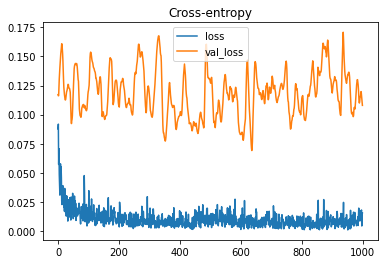

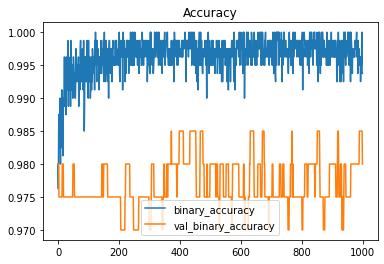

In [123]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    xtrain, ytrain,
    validation_data=(xvalid, yvalid),
    batch_size=512,
    epochs=1000,
    #callbacks=[early_stopping],
    verbose = 0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))
print(("Best Loss: {:0.4f}" +\
      "\nBest Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(),
              history_df['binary_accuracy'].max()))


In [124]:
history_df['binary_accuracy'].mean()

0.9964487387537956

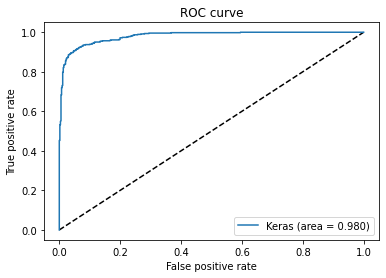

In [125]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(test_df.drop(['label'], axis = 'columns')).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_df.label, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()